# Requisitos

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import resize
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.optimizers import SGD

# Cargada de datos

In [ ]:
!gdown 1H4kSVl34uUNYAoK5irjxsS0RXAe_PP5_
!gdown 1Z_OUXBsfCRm2tDuMC2LL1B_1DmpeN9P1

Downloading...
From: https://drive.google.com/uc?id=1H4kSVl34uUNYAoK5irjxsS0RXAe_PP5_
To: /content/X.npy
100% 9.28M/9.28M [00:00<00:00, 47.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Z_OUXBsfCRm2tDuMC2LL1B_1DmpeN9P1
To: /content/y.npy
100% 6.62k/6.62k [00:00<00:00, 35.3MB/s]


In [ ]:
X_raw = np.load('X.npy')
X_raw = X_raw/255.
y = np.load('y.npy')
X = []
size = (28,28)
for x in X_raw:
    X.append(resize(x, size))
X = np.array(X)

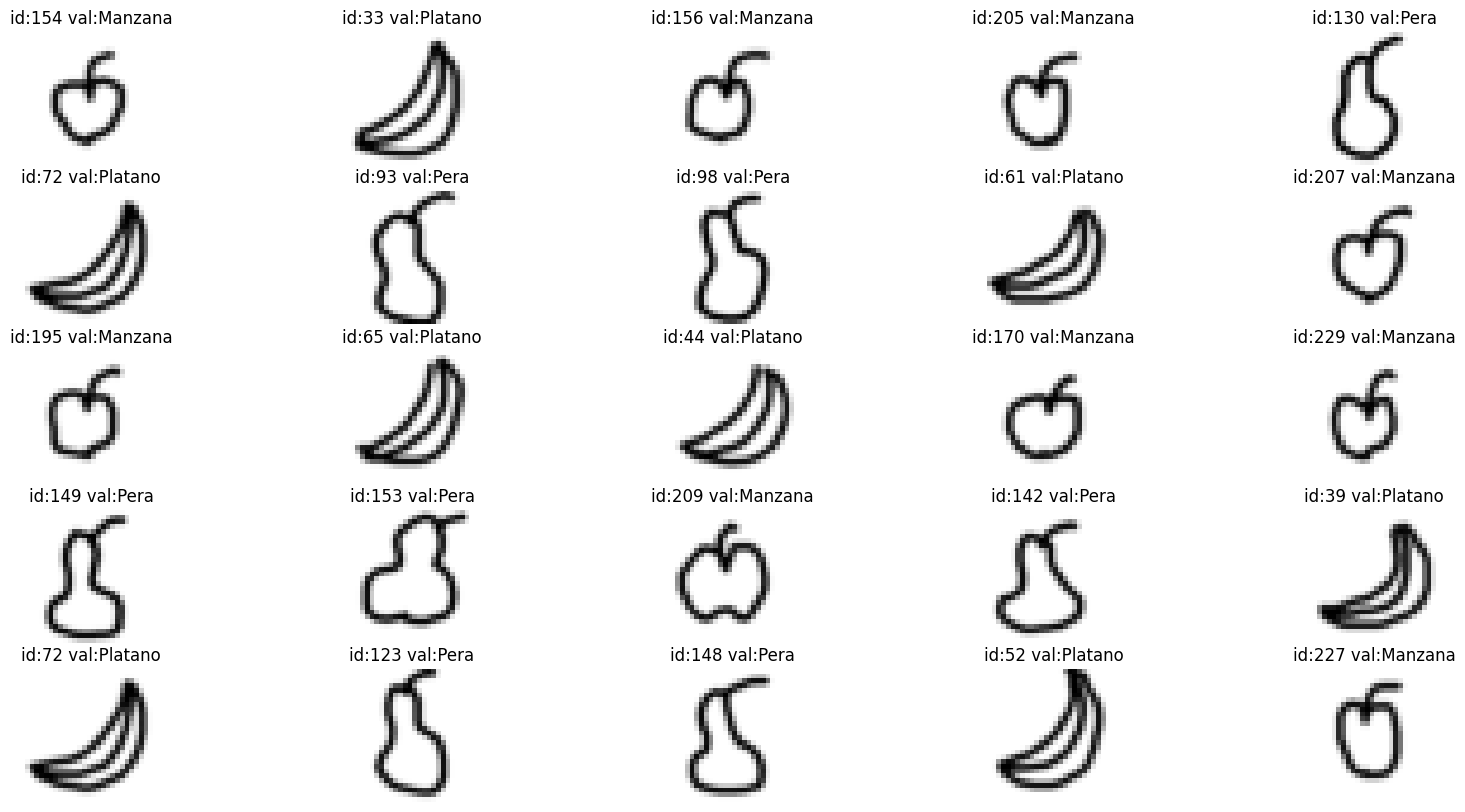

In [ ]:
plt.figure(figsize=(20,10))
for i in range(25):
    plt.subplot(5,5, i+1)
    idx = np.random.choice(X.shape[0], 1)[0]
    plt.title('id:{} val:{}'.format(idx, y[idx] ))
    plt.imshow(-X[idx], cmap='gray')
    plt.axis('off')
plt.show()

# Entrenamiento del modelo

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)
# Ajustamos las dimensiones de las imágenes
if X_train.ndim == 3:
    X_train = X_train[...,None]
    X_test = X_test[..., None]
    print(X_train.shape, X_test.shape)

(185, 28, 28, 1) (47, 28, 28, 1)


In [ ]:
bs = 16
lr = 0.0001
class_mapping = {'Platano': 0, 'Pera': 1, 'Manzana': 2}
y_train = np.array([class_mapping[label] for label in y_train])
y_test = np.array([class_mapping[label] for label in y_test])
y_train = y_train.astype(int)
y_test = y_test.astype(int)

model = Sequential([Conv2D(32, 3, activation='relu', input_shape=(*size,1)),
                    MaxPool2D(),
                    Conv2D(64, 3, activation='relu', padding ='same'),
                    MaxPool2D(),
                    Conv2D(128, 3, activation='relu', padding ='same'),
                    MaxPool2D(),
                    Flatten(),
                    Dense(128, activation='relu'), #modificar!
                    Dense(3, activation='softmax')]) #no modificar

In [ ]:
optimizer1 = SGD(learning_rate=lr)
model.compile(optimizer= optimizer1, loss='sparse_categorical_crossentropy' , metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 6, 6, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 3, 3, 128)         0

In [ ]:
log = model.fit(X_train, y_train, batch_size=bs, epochs=800, validation_data=(X_test, y_test))
model.save('modelo_entrenado.h5')

Epoch 1/800
12/12 [==============================] - 1s 32ms/step - loss: 1.1000 - accuracy: 0.3946 - val_loss: 1.1022 - val_accuracy: 0.3830
Epoch 2/800
12/12 [==============================] - 0s 30ms/step - loss: 1.0995 - accuracy: 0.3946 - val_loss: 1.1017 - val_accuracy: 0.3830
Epoch 3/800
12/12 [==============================] - 0s 28ms/step - loss: 1.0990 - accuracy: 0.3946 - val_loss: 1.1012 - val_accuracy: 0.3830
Epoch 4/800
12/12 [==============================] - 0s 32ms/step - loss: 1.0984 - accuracy: 0.3946 - val_loss: 1.1007 - val_accuracy: 0.3830
Epoch 5/800
12/12 [==============================] - 0s 21ms/step - loss: 1.0979 - accuracy: 0.3946 - val_loss: 1.1002 - val_accuracy: 0.3830
Epoch 6/800
12/12 [==============================] - 0s 16ms/step - loss: 1.0974 - accuracy: 0.3946 - val_loss: 1.0997 - val_accuracy: 0.3830
Epoch 7/800
12/12 [==============================] - 0s 17ms/step - loss: 1.0969 - accuracy: 0.3946 - val_loss: 1.0992 - val_accuracy: 0.3830
Epoch 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Probando el modelo

In [ ]:
#Probando modelo
etiqueta_a_fruta = {0: 'Platano', 1: 'Pera', 2: 'Manzana'}

In [ ]:
idx = np.random.choice(X_test.shape[0], 1)[0]
im = X_test[idx]
label = y_test[idx]
nombre_fruta = etiqueta_a_fruta.get(label, 'Desconocida')

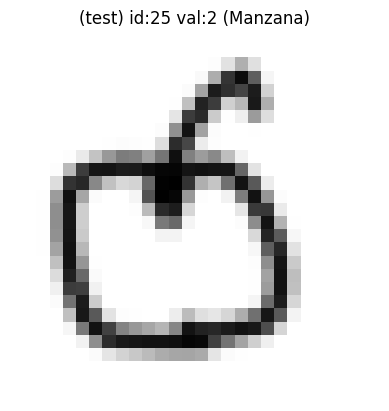

In [ ]:
plt.title('(test) id:{} val:{} ({})'.format(idx, label, nombre_fruta))
plt.axis('off')
plt.imshow(-im[:,:,0], cmap='gray')
plt.show()


In [ ]:
#Usando el modelo
salida = model.predict(im[None,:,:,:])[0]

1/1 [==============================] - 0s 15ms/step


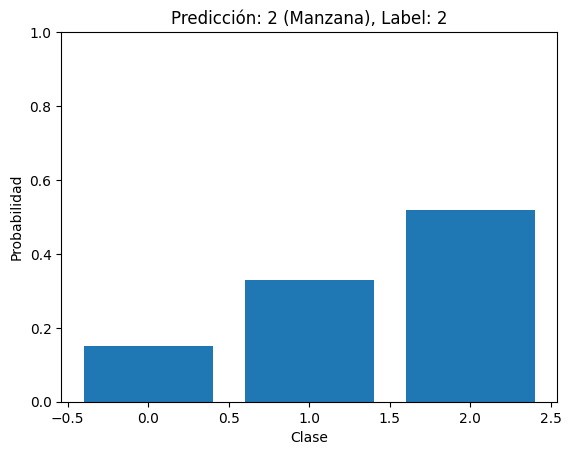

In [ ]:
plt.figure()
plt.title("Predicción: {} ({}), Label: {}".format(salida.argmax(), nombre_fruta, label))
plt.ylabel("Probabilidad")
plt.xlabel("Clase")
plt.ylim([0, 1])
plt.bar(np.arange(len(salida)), salida)
plt.show()